In [0]:
from google.colab import files
files.upload()

KeyboardInterrupt: ignored

####Importando o arquivo de dados meteorológicos do Rio de Janeiro.

In [0]:
import pandas as pd
import numpy as py
weather =  pd.read_csv('rio.csv')

####Criando o dataframe "weather" a partir do aquivo .rio.csv importado

In [0]:
weather.head()

,Unnamed: 0,Weather station id,City,Elevation,Lat,Lon,inme,city,prov,Datetime,...,Max Temperature,dmax,Min Temperature,dmin,Humidity,Max Humidity,Min Humidity,Wind Speed,Wind Direction,gust
0,5636528,372,MARAMBAIA,9.0,-23.050334,-43.595685,A602,Rio de Janeiro,RJ,2002-11-08 00:00:00,...,18.2,15.8,18.0,15.4,86.0,86.0,85.0,2.0,28.0,3.8
1,5636529,372,MARAMBAIA,9.0,-23.050334,-43.595685,A602,Rio de Janeiro,RJ,2002-11-08 01:00:00,...,18.6,16.3,18.2,15.7,87.0,87.0,85.0,2.5,348.0,5.9
2,5636530,372,MARAMBAIA,9.0,-23.050334,-43.595685,A602,Rio de Janeiro,RJ,2002-11-08 02:00:00,...,18.5,16.4,17.6,15.4,89.0,89.0,86.0,2.5,17.0,6.1
3,5636531,372,MARAMBAIA,9.0,-23.050334,-43.595685,A602,Rio de Janeiro,RJ,2002-11-08 03:00:00,...,17.8,15.9,17.4,15.7,90.0,90.0,89.0,1.8,29.0,3.0
4,5636532,372,MARAMBAIA,9.0,-23.050334,-43.595685,A602,Rio de Janeiro,RJ,2002-11-08 04:00:00,...,17.4,15.8,17.2,15.6,91.0,91.0,90.0,2.4,2.0,3.9


###Renomeando as colunas:

In [0]:
weather.rename(columns={'City':'Station Name','gust':'Wind Gust','prov':'State', 'dmax':'Max Dew Point', 'dmin':'Min Dew Point', 'dewp':'Dew Point', 'yr':'Year', 'mo':'Month', 'da':'Day', 'hr':'Hour', 'date':'Date' }, inplace=True)


In [0]:
weather.head()

,Unnamed: 0,Weather station id,Station Name,Elevation,Lat,Lon,inme,city,State,Datetime,...,Max Temperature,Max Dew Point,Min Temperature,Min Dew Point,Humidity,Max Humidity,Min Humidity,Wind Speed,Wind Direction,Wind Gust
0,5636528,372,MARAMBAIA,9.0,-23.050334,-43.595685,A602,Rio de Janeiro,RJ,2002-11-08 00:00:00,...,18.2,15.8,18.0,15.4,86.0,86.0,85.0,2.0,28.0,3.8
1,5636529,372,MARAMBAIA,9.0,-23.050334,-43.595685,A602,Rio de Janeiro,RJ,2002-11-08 01:00:00,...,18.6,16.3,18.2,15.7,87.0,87.0,85.0,2.5,348.0,5.9
2,5636530,372,MARAMBAIA,9.0,-23.050334,-43.595685,A602,Rio de Janeiro,RJ,2002-11-08 02:00:00,...,18.5,16.4,17.6,15.4,89.0,89.0,86.0,2.5,17.0,6.1
3,5636531,372,MARAMBAIA,9.0,-23.050334,-43.595685,A602,Rio de Janeiro,RJ,2002-11-08 03:00:00,...,17.8,15.9,17.4,15.7,90.0,90.0,89.0,1.8,29.0,3.0
4,5636532,372,MARAMBAIA,9.0,-23.050334,-43.595685,A602,Rio de Janeiro,RJ,2002-11-08 04:00:00,...,17.4,15.8,17.2,15.6,91.0,91.0,90.0,2.4,2.0,3.9


In [0]:
weather.shape

(216769, 32)

####Com o código abaixo, mostramos a quantidade de dados ausentes em cada variável.

In [0]:
print(weather.isnull().sum())

Unnamed: 0                 0
Weather station id         0
Station Name               0
Elevation                  1
Lat                        1
Lon                        1
inme                       1
city                       1
State                      1
Datetime                   1
Date                       1
Year                       1
Month                      1
Day                        1
Hour                       1
Precipitation         180780
Air Pressure               1
Max Pressure               1
Min Pressure               1
Radiation              91776
Temperature                1
Dew Point                  2
Max Temperature            1
Max Dew Point              2
Min Temperature            1
Min Dew Point              1
Humidity                   1
Max Humidity               1
Min Humidity              29
Wind Speed             18979
Wind Direction             1
Wind Gust               4882
dtype: int64


####Agora eliminaremos as colunas com mais de 70% de dados ausentes

In [0]:
weathermod = weather.dropna(thresh=0.7*len(weather), axis=1)

In [0]:
weathermod.shape

(216769, 30)

####Nosso dataframe agora tem as seguintes entradas nulas:

In [0]:
print(weathermod.isnull().sum())

Unnamed: 0                0
Weather station id        0
Station Name              0
Elevation                 1
Lat                       1
Lon                       1
inme                      1
city                      1
State                     1
Datetime                  1
Date                      1
Year                      1
Month                     1
Day                       1
Hour                      1
Air Pressure              1
Max Pressure              1
Min Pressure              1
Temperature               1
Dew Point                 2
Max Temperature           1
Max Dew Point             2
Min Temperature           1
Min Dew Point             1
Humidity                  1
Max Humidity              1
Min Humidity             29
Wind Speed            18979
Wind Direction            1
Wind Gust              4882
dtype: int64


####Eliminando agora as instâncias com 1 ou 2 dados faltantes.

In [0]:
weathermod1 = weathermod.dropna(subset=list(filter(lambda x: (x != 'Wind Speed' and x != 'Wind Gust' and x != 'Min Humidity'), weathermod.columns)), axis=0)
print(weathermod1.isnull().sum())

Unnamed: 0                0
Weather station id        0
Station Name              0
Elevation                 0
Lat                       0
Lon                       0
inme                      0
city                      0
State                     0
Datetime                  0
Date                      0
Year                      0
Month                     0
Day                       0
Hour                      0
Air Pressure              0
Max Pressure              0
Min Pressure              0
Temperature               0
Dew Point                 0
Max Temperature           0
Max Dew Point             0
Min Temperature           0
Min Dew Point             0
Humidity                  0
Max Humidity              0
Min Humidity             28
Wind Speed            18978
Wind Direction            0
Wind Gust              4881
dtype: int64


In [0]:
weathermod1.shape

(216766, 30)

In [0]:
weathermod1.dtypes


Unnamed: 0              int64
Weather station id      int64
Station Name           object
Elevation             float64
Lat                   float64
Lon                   float64
inme                   object
city                   object
State                  object
Datetime               object
Date                   object
Year                  float64
Month                 float64
Day                   float64
Hour                  float64
Air Pressure          float64
Max Pressure          float64
Min Pressure          float64
Temperature           float64
Dew Point             float64
Max Temperature       float64
Max Dew Point         float64
Min Temperature       float64
Min Dew Point         float64
Humidity              float64
Max Humidity          float64
Min Humidity          float64
Wind Speed            float64
Wind Direction        float64
Wind Gust             float64
dtype: object

####As instâncias "Min Humidity", "Wind Speed" e "Wind Gust" contém uma quantidade de instâncias faltantes passíveis de algum processo de inputação. Faremos a inputação dos dados com base na mediana da distribuição, dado a característica assimétrica das mesmas.

In [0]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import random



In [0]:
weather2 = weathermod1

In [0]:
weather2['Min Humidity'].fillna((weather2['Min Humidity'].median()), inplace=True)
print(weather2.isnull().sum())

Unnamed: 0                0
Weather station id        0
Station Name              0
Elevation                 0
Lat                       0
Lon                       0
inme                      0
city                      0
State                     0
Datetime                  0
Date                      0
Year                      0
Month                     0
Day                       0
Hour                      0
Air Pressure              0
Max Pressure              0
Min Pressure              0
Temperature               0
Dew Point                 0
Max Temperature           0
Max Dew Point             0
Min Temperature           0
Min Dew Point             0
Humidity                  0
Max Humidity              0
Min Humidity              0
Wind Speed            18978
Wind Direction            0
Wind Gust              4881
dtype: int64


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


####Histograma da varíavel "Min Humidity" pré-inputação:

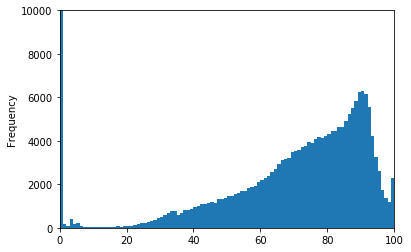

In [0]:
fig, ax = plt.subplots()
ax.set_xlim([weathermod1['Min Humidity'].min(),weathermod1['Min Humidity'].max()])
ax.set_ylim(0,10000)
weathermod1['Min Humidity'].plot.hist(bins=100);

####Histograma pós-inputação:

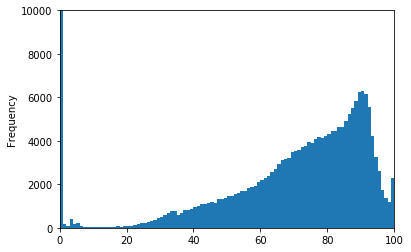

In [0]:
fig, ax = plt.subplots()
ax.set_xlim([weather2['Min Humidity'].min(),weather2['Min Humidity'].max()])
ax.set_ylim(0,10000)
weather2['Min Humidity'].plot.hist(bins=100);

####Analogamente, agora a visualização e inputação para a variável "Wind Speed":
#####Histograma pré-inputação:



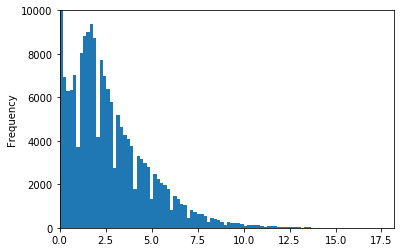

In [0]:
fig, ax = plt.subplots()
ax.set_xlim([weathermod1['Wind Speed'].min(),weathermod1['Wind Speed'].max()])
ax.set_ylim(0,10000)
weathermod1['Wind Speed'].plot.hist(bins=100);

#####Inputando os dados:

In [0]:
weather2['Wind Speed'].fillna((weather2['Wind Speed'].median()), inplace=True)


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


#####Histograma pós-processamento:

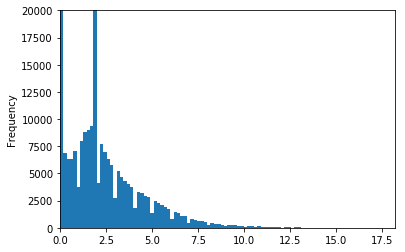

In [0]:
fig, ax = plt.subplots()
ax.set_xlim([weather2['Wind Speed'].min(),weather2['Wind Speed'].max()])
ax.set_ylim(0,20000)
weather2['Wind Speed'].plot.hist(bins=100);

####Adicionando agora dados nas linhas faltantes da coluna "Wind Gust", segundo uma distribuição uniforme entre o máximo e o mínimo dos dados. 
#####Histograma pré-inputação:


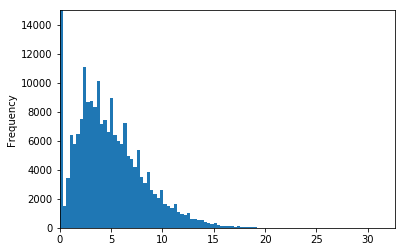

In [0]:
fig, ax = plt.subplots()
ax.set_xlim([weathermod1['Wind Gust'].min(), weathermod1['Wind Gust'].max()])
ax.set_ylim(0, 15000)
weathermod1['Wind Gust'].plot.hist(bins=100);

#####Agora, analogamente, adicionado os dados na coluna "Wind Gust"

In [0]:
weather2['Wind Gust'].fillna(random.normalvariate(weather2['Wind Gust'].mean(),weather2['Wind Gust'].var()), inplace=True)


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


#####Histograma pós-inputação:

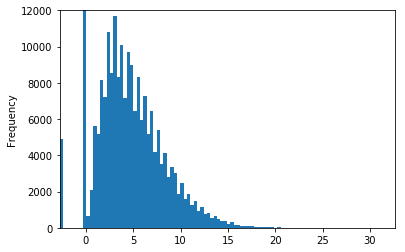

In [0]:
fig, ax = plt.subplots()
ax.set_xlim([weather2['Wind Gust'].min(),weather2['Wind Gust'].max()])
ax.set_ylim(0, 12000)
weather2['Wind Gust'].plot.hist(bins=100);

####Como vemos agora, o banco de dados está completamente preenchido.

In [0]:
print(weather2.isnull().sum())

Unnamed: 0            0
Weather station id    0
Station Name          0
Elevation             0
Lat                   0
Lon                   0
inme                  0
city                  0
State                 0
Datetime              0
Date                  0
Year                  0
Month                 0
Day                   0
Hour                  0
Air Pressure          0
Max Pressure          0
Min Pressure          0
Temperature           0
Dew Point             0
Max Temperature       0
Max Dew Point         0
Min Temperature       0
Min Dew Point         0
Humidity              0
Max Humidity          0
Min Humidity          0
Wind Speed            0
Wind Direction        0
Wind Gust             0
dtype: int64


####Observando agora a correlação entre as variáveis quantitativas do dataset:

In [0]:
weather3 = weather2

In [0]:
weather3.drop(['Station Name', 'State', 'city', 'inme', 'Date', 'Datetime', 'Lat', 'Lon', 'Year', 'Month', 'Day','Hour','Weather station id'], axis=1)

,Unnamed: 0,Elevation,Air Pressure,Max Pressure,Min Pressure,Temperature,Dew Point,Max Temperature,Max Dew Point,Min Temperature,Min Dew Point,Humidity,Max Humidity,Min Humidity,Wind Speed,Wind Direction,Wind Gust
0,5636528,9.0,1021.4,1021.4,1021.1,18.2,15.7,18.2,15.8,18.0,15.4,86.0,86.0,85.0,2.0,28.0,3.8
1,5636529,9.0,1021.9,1022.0,1021.4,18.5,16.2,18.6,16.3,18.2,15.7,87.0,87.0,85.0,2.5,348.0,5.9
2,5636530,9.0,1021.7,1022.5,1021.7,17.8,15.9,18.5,16.4,17.6,15.4,89.0,89.0,86.0,2.5,17.0,6.1
3,5636531,9.0,1020.9,1021.7,1020.9,17.4,15.7,17.8,15.9,17.4,15.7,90.0,90.0,89.0,1.8,29.0,3.0
4,5636532,9.0,1020.3,1020.8,1020.3,17.2,15.6,17.4,15.8,17.2,15.6,91.0,91.0,90.0,2.4,2.0,3.9
5,5636533,9.0,1019.6,1020.3,1019.4,16.1,14.6,17.2,15.6,16.1,14.6,91.0,91.0,91.0,1.4,13.0,3.2
6,5636534,9.0,1019.3,1019.6,1019.2,15.8,14.4,16.1,14.7,15.5,14.1,91.0,92.0,91.0,1.7,67.0,2.5
7,5636535,9.0,1019.0,1019.3,1019.0,15.5,14.2,15.8,14.5,15.4,14.1,92.0,92.0,91.0,2.1,44.0,3.2
8,5636536,9.0,1019.1,1019.1,1018.9,15.3,14.1,15.5,14.3,15.3,14.0,92.0,93.0,92.0,2.5,53.0,3.8
9,5636537,9.0,1019.3,1019.3,1018.9,15.8,14.6,15.8,14.6,15.0,13.8,93.0,93.0,92.0,2.5,35.0,3.9


In [0]:
weather3.corr()

,Unnamed: 0,Weather station id,Elevation,Lat,Lon,Year,Month,Day,Hour,Air Pressure,...,Max Temperature,Max Dew Point,Min Temperature,Min Dew Point,Humidity,Max Humidity,Min Humidity,Wind Speed,Wind Direction,Wind Gust
Unnamed: 0,1.000000,0.993653,0.990453,0.936276,0.923437,0.271476,0.008170,0.002215,0.000020,0.166844,...,0.193012,0.238441,0.193630,0.223704,0.091883,0.099800,0.079628,-0.245486,0.162272,-0.143444
Weather station id,0.993653,1.000000,0.974441,0.898632,0.957889,0.195754,0.009294,0.002331,0.000007,0.150027,...,0.172766,0.220964,0.174515,0.207750,0.088054,0.094855,0.076942,-0.239436,0.154798,-0.142350
Elevation,0.990453,0.974441,1.000000,0.974216,0.868902,0.250806,0.007033,0.001704,0.000007,0.147518,...,0.179293,0.216036,0.179079,0.200715,0.074619,0.082748,0.061927,-0.271351,0.163160,-0.167292
Lat,0.936276,0.898632,0.974216,1.000000,0.734820,0.293191,0.004401,0.000986,0.000007,0.137407,...,0.176622,0.199971,0.174449,0.183322,0.057286,0.066331,0.043661,-0.289443,0.163163,-0.183734
Lon,0.923437,0.957889,0.868902,0.734820,1.000000,0.110748,0.011489,0.002959,0.000006,0.142015,...,0.151504,0.210738,0.155631,0.201207,0.098642,0.103236,0.090379,-0.180736,0.132534,-0.099824
Year,0.271476,0.195754,0.250806,0.293191,0.110748,1.000000,-0.080896,-0.004861,0.000006,0.329259,...,0.341351,0.372231,0.334830,0.357338,0.162813,0.175001,0.151476,0.063426,0.097047,0.117970
Month,0.008170,0.009294,0.007033,0.004401,0.011489,-0.080896,1.000000,0.008922,-0.000002,0.029366,...,-0.070621,-0.044174,-0.073878,-0.043007,0.050931,0.046399,0.051730,0.058161,0.013621,0.064094
Day,0.002215,0.002331,0.001704,0.000986,0.002959,-0.004861,0.008922,1.000000,-0.000003,0.005734,...,-0.003329,0.004760,-0.002344,0.004814,0.010575,0.010473,0.011000,0.004643,0.013984,0.000288
Hour,0.000020,0.000007,0.000007,0.000007,0.000006,0.000006,-0.000002,-0.000003,1.000000,0.007188,...,0.187476,0.014095,0.177106,-0.005529,-0.174428,-0.163861,-0.199073,0.214733,-0.039748,0.287445
Air Pressure,0.166844,0.150027,0.147518,0.137407,0.142015,0.329259,0.029366,0.005734,0.007188,1.000000,...,0.830666,0.644013,0.834708,0.631262,0.713803,0.738427,0.695662,0.359695,0.393330,0.390067
